In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import nmf
np.random.seed(42)

In [2]:
def zeros_mask(arr):
    m, n = arr.shape
    indices = np.random.choice(m * n, replace=False, size=int(m * n * 0.2))
    arr[np.unravel_index(indices, (m, n))] = 0
    return arr


m, n, r_true = 12, 8, 3
W_true = np.zeros((m, r_true))
W_true[0:4, 0] = 1
W_true[4:8, 1] = 1
W_true[8:m, 2] = 1
H_true = zeros_mask(np.random.rand(r_true, n))
M = W_true @ H_true

In [3]:
W_true

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [4]:
H_true

array([[0.        , 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.        , 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985, 0.83244264,
        0.21233911, 0.18182497, 0.        ],
       [0.30424224, 0.52475643, 0.43194502, 0.29122914, 0.        ,
        0.13949386, 0.29214465, 0.36636184]])

In [5]:
r = 6
W_ini = np.random.rand(m, r)
H_ini = np.random.rand(r, n)

### lambda = 0.0

In [6]:
# _lambda = 0.0
# itermax = 50
#
# _, _, _, _, fscores1, gscores1 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=1)
# _, _, _, _, fscores2, gscores2 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=2)
# _, _, _, _, fscores3, gscores3 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=3)

In [7]:
# fscores_all = [fscores1, fscores2, fscores3]
# gscores_all = [gscores1, gscores2, gscores3]
# titles = ['subgradient', 'admm', 'smoothing']
#
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#
# for idx in range(3):
#     ax[idx].set_yscale('log')
#     ax[idx].plot(fscores_all[idx])
#     ax[idx].plot(gscores_all[idx])
#     ax[idx].plot(fscores_all[idx] + _lambda * gscores_all[idx])
#     ax[idx].legend(['f', 'g', 'total'])
#     ax[idx].set_title(titles[idx])

### lambda = 0.4

In [8]:
# _lambda = 0.4
# itermax = 50
#
# _, _, _, _, fscores1, gscores1 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=1)
# _, _, _, _, fscores2, gscores2 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=2)
# _, _, _, _, fscores3, gscores3 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=itermax, update_ver=3)

In [9]:
# fscores_all = [fscores1, fscores2, fscores3]
# gscores_all = [gscores1, gscores2, gscores3]
# titles = ['subgradient', 'admm', 'smoothing']
#
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#
# for idx in range(3):
#     ax[idx].set_yscale('log')
#     ax[idx].plot(fscores_all[idx])
#     ax[idx].plot(gscores_all[idx])
#     ax[idx].plot(fscores_all[idx] + _lambda * gscores_all[idx])
#     ax[idx].legend(['f', 'g', 'total'])
#     ax[idx].set_title(titles[idx])

In [10]:
itermax = 200

W1b, H1b, W1l, H1l, fscores1, gscores1 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=0.6, itermax=itermax, scale_lambda=False)
W2b, H2b, W2l, H2l, fscores2, gscores2 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=0.6, itermax=itermax, scale_lambda=False, gswitch=True)
W3b, H3b, W3l, H3l, fscores3, gscores3 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=0.6, itermax=itermax, scale_lambda=True)
W4b, H4b, W4l, H4l, fscores4, gscores4 = nmf(M, W_ini.copy(), H_ini.copy(), _lambda=0.6, itermax=itermax, scale_lambda=True, gswitch=True)

Iteration: 1, f=4.374577681095611, g=1.1755238810910893,  total=5.079892009750265
Iteration: 2, f=2.2725733501282086, g=0.649894509571821,  total=2.662510055871301
Iteration: 3, f=1.8015658933019725, g=0.6830324406904658,  total=2.211385357716252
Iteration: 4, f=1.3101212404522948, g=0.6959785953948703,  total=1.727708397689217
Iteration: 5, f=0.8736825168657086, g=0.6581644971383426,  total=1.2685812151487141
Iteration: 6, f=0.5869629399014528, g=0.6261314539174111,  total=0.9626418122518994
Iteration: 7, f=0.4163347173579476, g=0.5972113577359927,  total=0.7746615319995431
Iteration: 8, f=0.3127369924205487, g=0.5708859232657776,  total=0.6552685463800152
Iteration: 9, f=0.24475365603563465, g=0.5501679538337259,  total=0.5748544283358701
Iteration: 10, f=0.20753696988739154, g=0.5346156835975139,  total=0.5283063800458998
Iteration: 11, f=0.1888665855391849, g=0.5198340631617007,  total=0.5007670234362053
Iteration: 12, f=0.17739571674854374, g=0.5059606541530546,  total=0.480972109

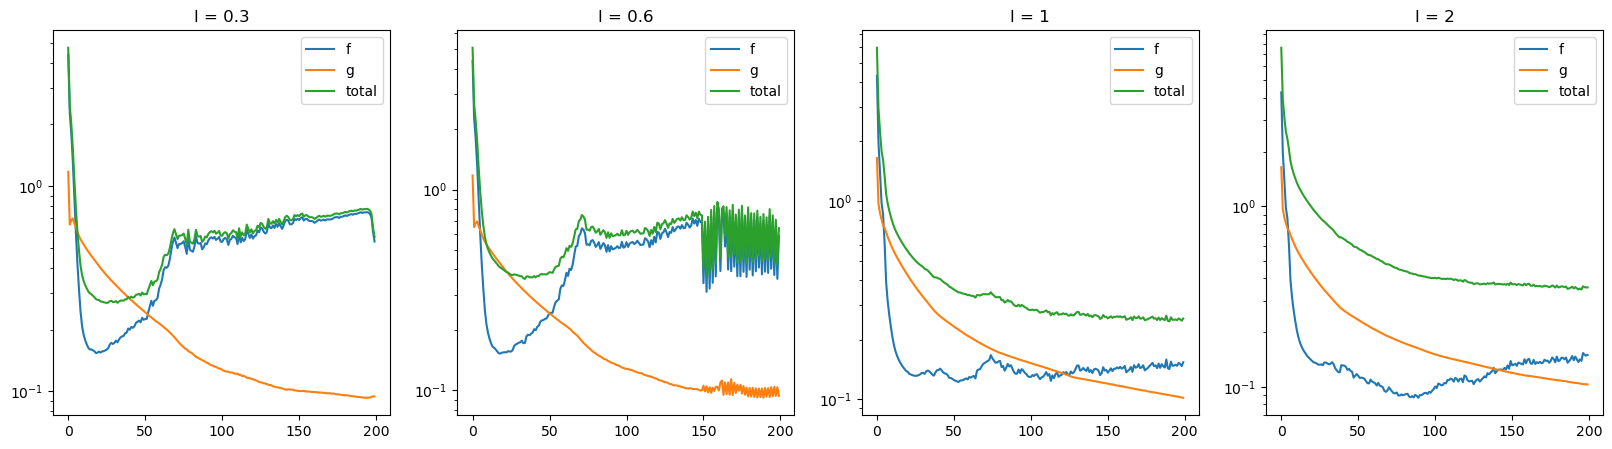

In [11]:
fscores_all = [fscores1, fscores2, fscores3, fscores4]
gscores_all = [gscores1, gscores2, gscores3, gscores4]
lambdas = [0.3, 0.6, 1, 2]
titles = ['l = 0.3', 'l = 0.6', 'l = 1', 'l = 2']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for idx in range(4):
    ax[idx].set_yscale('log')
    ax[idx].plot(fscores_all[idx])
    ax[idx].plot(gscores_all[idx])
    ax[idx].plot(fscores_all[idx] + lambdas[idx] * gscores_all[idx])
    ax[idx].legend(['f', 'g', 'total'])
    ax[idx].set_title(titles[idx])

In [12]:
W_ins = W2l

In [13]:
n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
            n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])

In [14]:
for row in range(r):
    n[row, :] = n[row, :]  / sum(n[row, :])

In [15]:
for row in n:
    print(row)

[0.         0.24772604 0.16827252 0.18234617 0.21846619 0.18318908]
[0.38952377 0.         0.1717271  0.14698986 0.11653601 0.17522326]
[0.39836047 0.25854703 0.         0.06015196 0.12548187 0.15745868]
[0.46337805 0.23755484 0.06456922 0.         0.10747341 0.12702448]
[0.46434097 0.15752541 0.11266026 0.08989075 0.         0.17558262]
[0.37102794 0.22570255 0.13471334 0.10124082 0.16731535 0.        ]


In [16]:
np.linalg.norm(W_ins,axis=1)

array([0.00680137, 0.00674256, 0.00682595, 0.00675876, 0.00449993,
       0.00456663, 0.00445172, 0.00447075, 0.00424209, 0.00428452,
       0.00427584, 0.00429128])

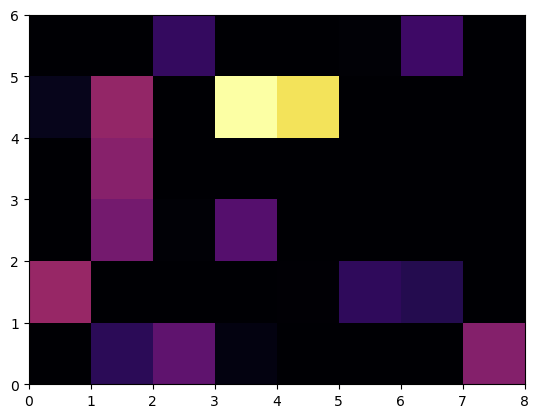

In [21]:
plt.pcolormesh(H2l, cmap='inferno')